<a href="https://colab.research.google.com/github/Ansosaji/fish-Assignment/blob/main/fish_ul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('fish.csv')

In [ ]:
data.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [ ]:
data.columns=['fish','firstcol','secondcol','thirdcol','fourthcol','fifthcol','sixthcol']

In [ ]:
data.head()

,fish,firstcol,secondcol,thirdcol,fourthcol,fifthcol,sixthcol
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [ ]:
data.isna().sum()

fish         0
firstcol     0
secondcol    0
thirdcol     0
fourthcol    0
fifthcol     0
sixthcol     0
dtype: int64

In [ ]:
data['fish'].value_counts()

Bream    33
Roach    20
Pike     17
Smelt    14
Name: fish, dtype: int64

In [ ]:
df=pd.get_dummies(data) #one hot encoding

In [ ]:
df.head()

,firstcol,secondcol,thirdcol,fourthcol,fifthcol,sixthcol,fish_Bream,fish_Pike,fish_Roach,fish_Smelt
0,290.0,24.0,26.3,31.2,40.0,13.8,1,0,0,0
1,340.0,23.9,26.5,31.1,39.8,15.1,1,0,0,0
2,363.0,26.3,29.0,33.5,38.0,13.3,1,0,0,0
3,430.0,26.5,29.0,34.0,36.6,15.1,1,0,0,0
4,450.0,26.8,29.7,34.7,39.2,14.2,1,0,0,0


In [ ]:
#Elbow method to find k value


from sklearn.cluster import KMeans

wcss=[]
for i in range(1,14):
  kmeans=KMeans(n_clusters=i,init = 'k-means++', random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)#inertia is the keyword to find the wcss value

In [ ]:
print(wcss)

[12199953.64404762, 4414860.051398119, 1906501.6135603716, 880254.503013889, 500641.88902724505, 338952.9576527778, 217862.5636796537, 131830.58673520925, 91887.08247391498, 74662.72845238095, 61736.005333333334, 49137.993904761905, 41675.20555555554]


Text(0, 0.5, 'WCSS')

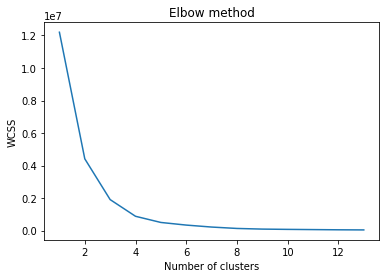

In [ ]:
plt.plot(range(1,14),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans=KMeans(n_clusters=4,init = 'k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df)

In [ ]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3], dtype=int32)

In [ ]:
x=data.iloc[:,[3,4]].values

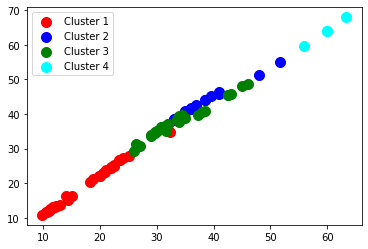

In [ ]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans==0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans==1,1],s=100, c='blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans==2,1],s=100, c='green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans==3,1],s=100, c='cyan', label = 'Cluster 4')


plt.legend()
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4,init = 'k-means++', random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

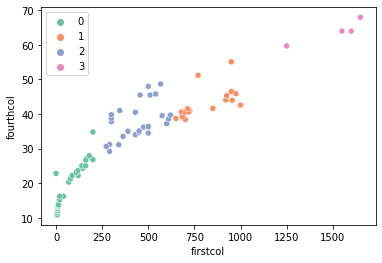

In [ ]:
sns.scatterplot(x=df['firstcol'],y=df['fourthcol'],hue=kmeans.labels_,palette='Set2')

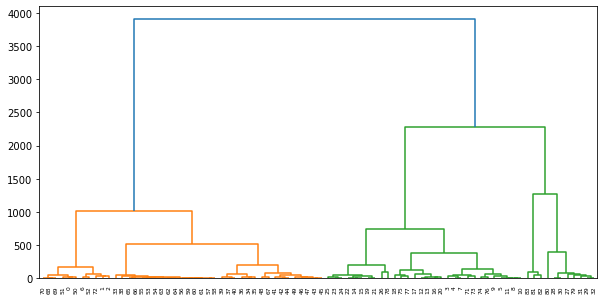

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = df.iloc[:, :-1].values

# Creating dendrogram
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)



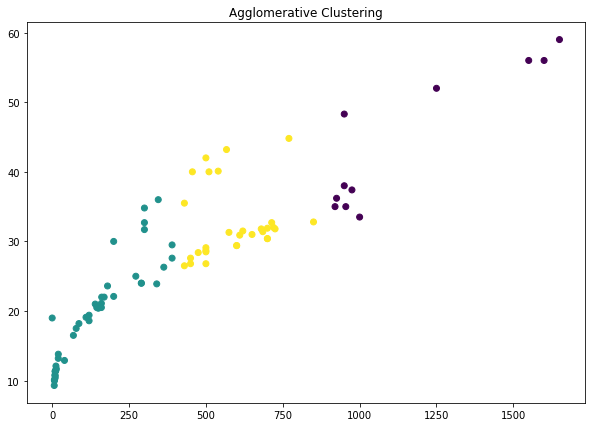

In [ ]:
# Creating agglomerative clustering model
n_clusters = 3 # the number of clusters is chosen based on the above dendrogram and elbow method
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
model.fit(X)

# Plotting agglomerative clustering
labels = model.labels_
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
#silhouette score

from sklearn.metrics import silhouette_score
cluster_labels = model.fit_predict(X)

silhouette= silhouette_score(X, cluster_labels)

print("The silhouette score is :", silhouette)

The silhouette score is : 0.5950279688121433


In [ ]:
#Also find the Silhoutte score of the k means model using the same dataset

cluster_labels2 = kmeans.fit_predict(X)

silhouette2 = silhouette_score(X, cluster_labels2)
print("The silhouette score is :", silhouette)

The silhouette score is : 0.5950279688121433
